<a href="https://colab.research.google.com/github/QUANT-CU/.github/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = yf.download('BTC-USD', interval='1d')[['Close']]

[*********************100%%**********************]  1 of 1 completed


In [4]:
volatility_days = 20
df['pct_change'] = df['Close'].pct_change() * 100
df['stdev'] = df['pct_change'].rolling(volatility_days).std()

df['vol'] = df['stdev'] * (365**0.5)
df.dropna(inplace=True)

sigma = df['vol'].mean() / 100

<ipython-input-4-f8d979217a84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_change'] = df['Close'].pct_change() * 100
<ipython-input-4-f8d979217a84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stdev'] = df['pct_change'].rolling(volatility_days).std()
<ipython-input-4-f8d979217a84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [5]:
T = 1

rf = 0.0025
beta = 0.95
mrp = 0.045
r = rf + beta * mrp

M = 365

S0 = df['Close'][-M]

dt = T / M

I = 25000

print("S0, initial day: \t", S0)
print("r, risk-free short rate: ", r)
print("M, number of days: \t", M)
print("I, paths simulating: \t", I)

S0, initial day: 	 29230.111328125
r, risk-free short rate:  0.04525
M, number of days: 	 365
I, paths simulating: 	 25000


<ipython-input-5-4ded886b3190>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S0 = df['Close'][-M]


In [6]:
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

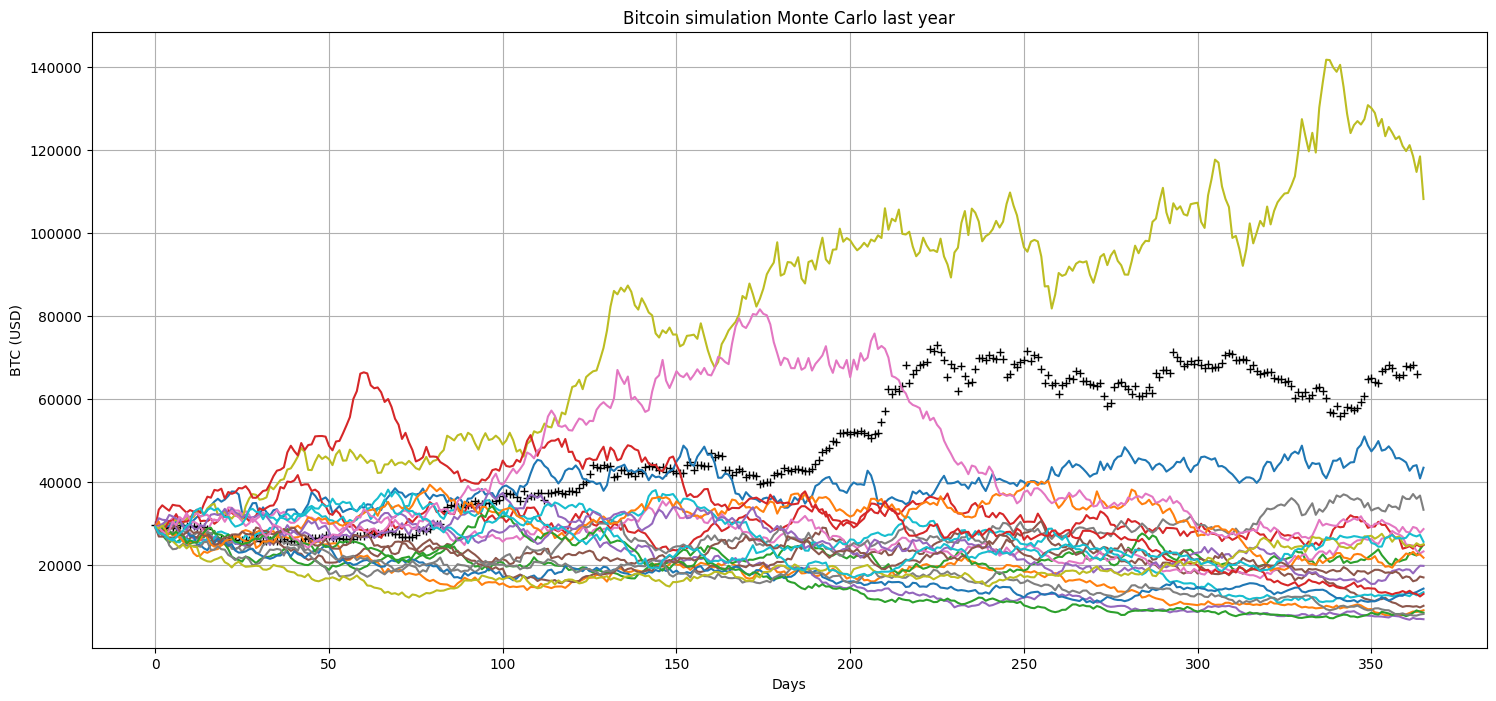

In [7]:
real = df[df.index > df.index[-M]]['Close']

plt.figure(figsize=(18,8))
plt.title('Bitcoin simulation Monte Carlo last year')
plt.plot(real.values, 'k+')
plt.plot(S[:, :20])
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('BTC (USD)')
plt.show()

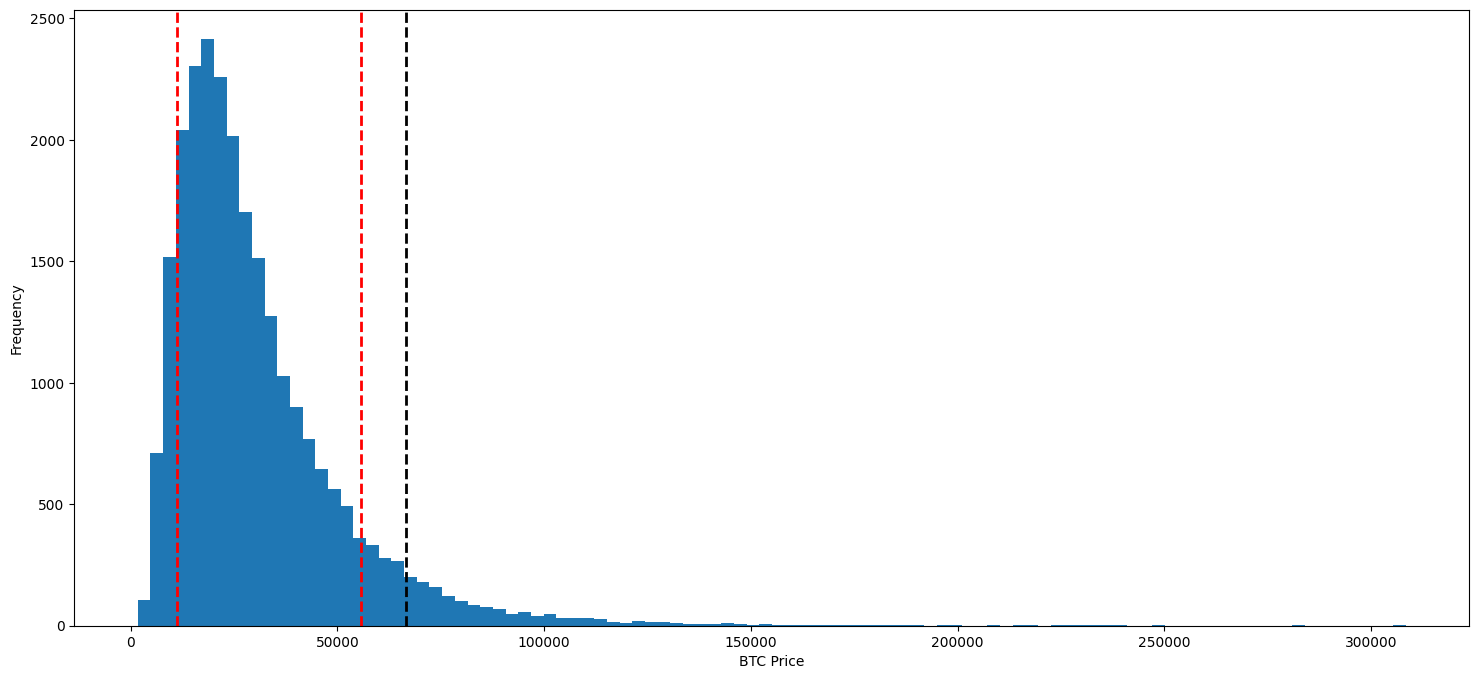

Expected BTC price: 	 30462.26
Quantile (5%): 		 8973.219282440023
Quantile (95%): 	 69990.57718869249


In [ ]:
closing_prices = S[-1]
top_ten = np.percentile(closing_prices, 100 - 10)

bottom_ten = np.percentile(closing_prices, 10)

plt.figure(figsize=(18,8))
plt.hist(closing_prices, bins=100)
plt.axvline(top_ten, color='r', linestyle='dashed', linewidth=2)
plt.axvline(bottom_ten, color='r', linestyle='dashed', linewidth=2)
plt.axvline(real.values[-1], color='k', linestyle='dashed', linewidth=2)
plt.xlabel('BTC Price')
plt.ylabel('Frequency')
plt.show()

print("Expected BTC price: \t", round(np.mean(closing_prices), 2))
print("Quantile (5%): \t\t", np.percentile(closing_prices, 5))
print("Quantile (95%): \t", np.percentile(closing_prices, 95))

In [ ]:
df1_T = pd.DataFrame(S[-1:, :I]).T
df1_T.columns = ['btc_price_last_day']
print("Nº simulations: \t\t\t", df1_T.count())
print("Nº simulations less price today: \t", df1_T[df1_T['btc_price_last_day'] < df['Close'][-1]].count())
print("Average simulations less price today: \t", df1_T[df1_T['btc_price_last_day'] < df['Close'][-1]].count() * 100 / df1_T.count())

Nº simulations: 			 btc_price_last_day    25000
dtype: int64
Nº simulations less price today: 	 btc_price_last_day    23529
dtype: int64
Average simulations less price today: 	 btc_price_last_day    94.116
dtype: float64


<ipython-input-10-476c2d55e0d5>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Nº simulations less price today: \t", df1_T[df1_T['btc_price_last_day'] < df['Close'][-1]].count())
<ipython-input-10-476c2d55e0d5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Average simulations less price today: \t", df1_T[df1_T['btc_price_last_day'] < df['Close'][-1]].count() * 100 / df1_T.count())
